In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression


In [75]:
#Creo DataFrames segun test y train
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
#Aplico la mediana para los Nulls en Age
df_train['Age']=df_train['Age'].fillna(df_train['Age'].median())
df_test['Age']=df_test['Age'].fillna(df_test['Age'].median())
#En embarked relleno los 2 nulls con la moda
df_train['Embarked']=df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])
df_test['Embarked']=df_test['Embarked'].fillna(df_test['Embarked'].mode()[0])
#Borro la columna Cabin por muchos nulls
if 'Cabin' in df_train.columns:
    df_train.drop('Cabin',axis=1,inplace=True)
if 'Cabin' in df_test.columns:
    df_test.drop('Cabin',axis=1,inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [77]:
print("--- Nulos restantes en TRAIN ---")
print(df_train.isnull().sum())

--- Nulos restantes en TRAIN ---
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [78]:
#reemplazar male female en sex por 0 y 1 respectivamente
df_train['Sex']=df_train['Sex'].replace('male',0)
df_train['Sex']=df_train['Sex'].replace('female',1)
df_test['Sex']=df_test['Sex'].replace('male',0)
df_test['Sex']=df_test['Sex'].replace('female',1)
df_train.head()

C:\Users\Dark7 120gb\AppData\Local\Temp\ipykernel_23188\1230902181.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Sex']=df_train['Sex'].replace('female',1)
C:\Users\Dark7 120gb\AppData\Local\Temp\ipykernel_23188\1230902181.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Sex']=df_test['Sex'].replace('female',1)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [79]:
#Reemplazo en Embarked S=0, C=1, Q=2
df_train['Embarked']=df_train['Embarked'].replace('S',0)
df_train['Embarked']=df_train['Embarked'].replace('C',1)
df_train['Embarked']=df_train['Embarked'].replace('Q',2)
df_test['Embarked'] = df_test['Embarked'].replace('S', 0)
df_test['Embarked'] = df_test['Embarked'].replace('C', 1)
df_test['Embarked'] = df_test['Embarked'].replace('Q', 2)
df_train['Embarked'].value_counts()

C:\Users\Dark7 120gb\AppData\Local\Temp\ipykernel_23188\1778843841.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Embarked']=df_train['Embarked'].replace('Q',2)
C:\Users\Dark7 120gb\AppData\Local\Temp\ipykernel_23188\1778843841.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Embarked'] = df_test['Embarked'].replace('Q', 2)


Embarked
0    646
1    168
2     77
Name: count, dtype: int64

In [80]:
#filleo un NA
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())
#Selecciono columnas para X, y, X_test 
X=df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y=df_train[['Survived']]
X_test=df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [81]:
#Entrenar y predecir
modelo=LogisticRegression(max_iter=1000)
modelo.fit(X,y)
predicciones=modelo.predict(X_test)

c:\Users\Dark7 120gb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
#DataFrame de submission
submission=pd.DataFrame({'PassengerID':df_test['PassengerId'],
                         'Survived':predicciones})
submission.head()
submission.to_csv('titanic_submission.csv', index=False)

🎯 Tu Precisión (Accuracy) estimada es: 79.89%


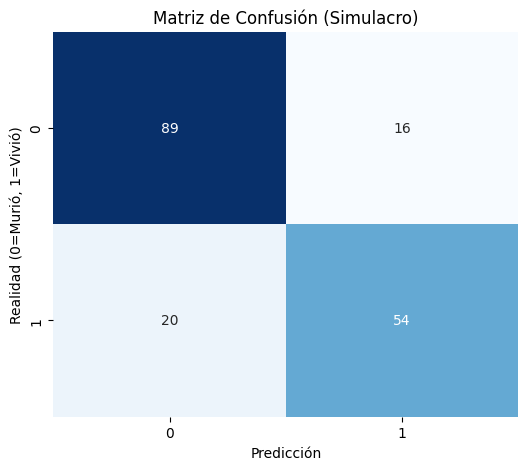

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [83]:
# 2. Hacemos el split interno (El Simulacro)
# Usamos random_state=42 para que siempre nos de el mismo resultado
X_train_interno, X_val, y_train_interno, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenamos un modelo NUEVO solo para esta prueba
# (No afecta al modelo final que enviarás a Kaggle)
modelo_validacion = LogisticRegression(max_iter=1000)
modelo_validacion.fit(X_train_interno, y_train_interno.values.ravel())

# 4. Predecimos sobre los datos de validación (que el modelo no ha visto)
predicciones_val = modelo_validacion.predict(X_val)

# --- RESULTADOS ---

# A) Accuracy (La nota que usa Kaggle)
acc = accuracy_score(y_val, predicciones_val)
print(f"🎯 Tu Precisión (Accuracy) estimada es: {acc:.2%}")

# B) Matriz de Confusión Visual
cm = confusion_matrix(y_val, predicciones_val)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión (Simulacro)')
plt.ylabel('Realidad (0=Murió, 1=Vivió)')
plt.xlabel('Predicción')
plt.show()

# C) Reporte detallado
print(classification_report(y_val, predicciones_val))